## Starbucks Capstone Project

In [2]:
#imports
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score, accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 


In [3]:
#Reading in JSONs
portfolio = pd.read_json('portfolio.json', orient='records', lines=True)
profile = pd.read_json('profile.json', orient='records', lines=1)
transcript = pd.read_json('transcript.json', orient='records', lines=True)

In [4]:
print('There are {} rows and {} columns in the portfolio dataframe.'.format(portfolio.shape[0], portfolio.shape[1]))

portfolio.describe(include='all')

There are 10 rows and 6 columns in the portfolio dataframe.


,reward,channels,difficulty,duration,offer_type,id
count,10.000000,10,10.000000,10.000000,10,10
unique,NaN,4,NaN,NaN,3,10
top,NaN,"[web, email, mobile, social]",NaN,NaN,bogo,ae264e3637204a6fb9bb56bc8210ddfd
freq,NaN,4,NaN,NaN,4,1
mean,4.200000,NaN,7.700000,6.500000,NaN,NaN
std,3.583915,NaN,5.831905,2.321398,NaN,NaN
min,0.000000,NaN,0.000000,3.000000,NaN,NaN
25%,2.000000,NaN,5.000000,5.000000,NaN,NaN
50%,4.000000,NaN,8.500000,7.000000,NaN,NaN
75%,5.000000,NaN,10.000000,7.000000,NaN,NaN


In [5]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [6]:
print('There are {} rows and {} columns in the profile dataframe.'.format(profile.shape[0], profile.shape[1]))

profile.describe(include='all')

There are 17000 rows and 5 columns in the profile dataframe.


,gender,age,id,became_member_on,income
count,14825,17000.000000,17000,1.700000e+04,14825.000000
unique,3,NaN,17000,NaN,NaN
top,M,NaN,68be06ca386d4c31939f3a4f0e3dd783,NaN,NaN
freq,8484,NaN,1,NaN,NaN
mean,NaN,62.531412,NaN,2.016703e+07,65404.991568
std,NaN,26.738580,NaN,1.167750e+04,21598.299410
min,NaN,18.000000,NaN,2.013073e+07,30000.000000
25%,NaN,45.000000,NaN,2.016053e+07,49000.000000
50%,NaN,58.000000,NaN,2.017080e+07,64000.000000
75%,NaN,73.000000,NaN,2.017123e+07,80000.000000


In [7]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [8]:
print('There are {} rows and {} columns in the transcript dataframe.'.format(transcript.shape[0], transcript.shape[1]))

transcript.describe(include='all')

There are 306534 rows and 4 columns in the transcript dataframe.


,person,event,value,time
count,306534,306534,306534,306534.000000
unique,17000,4,5121,NaN
top,94de646f7b6041228ca7dec82adb97d2,transaction,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},NaN
freq,51,138953,14983,NaN
mean,NaN,NaN,NaN,366.382940
std,NaN,NaN,NaN,200.326314
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,186.000000
50%,NaN,NaN,NaN,408.000000
75%,NaN,NaN,NaN,528.000000


#### Handling Missing Values

In [9]:
portfolio.isnull().sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

In [10]:
transcript.isnull().sum()

person    0
event     0
value     0
time      0
dtype: int64

In [11]:
profile.isnull().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

There are 2175 missing values in the "gender" column of the profile dataframe, which is a relatively small % of the dataset, so I'll replace the missing values with the column's mode. There are also the same amount of missing values in the "income" column of that dataframe, which I can fill with the mean of the column's values due to the graph's normality, excluding the missing data. 

# Profile Dataset Cleaning

Text(0, 0.5, 'Frequency')

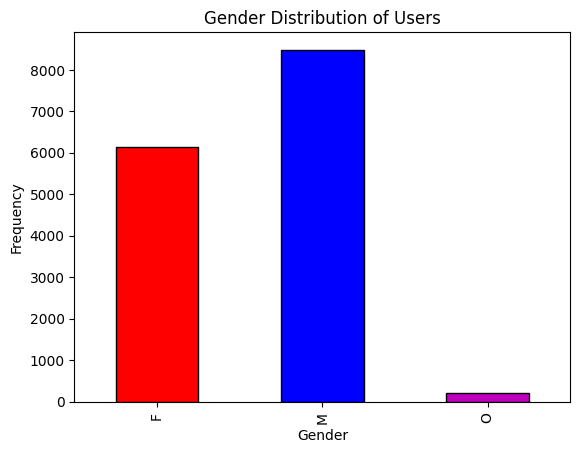

In [12]:
#In depth analysis of gender column of 'Profile' df
profile.groupby('gender')['id'].count().plot(kind='bar', edgecolor='black', color=['r', 'b', 'm'])
plt.title('Gender Distribution of Users')
plt.xlabel('Gender')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

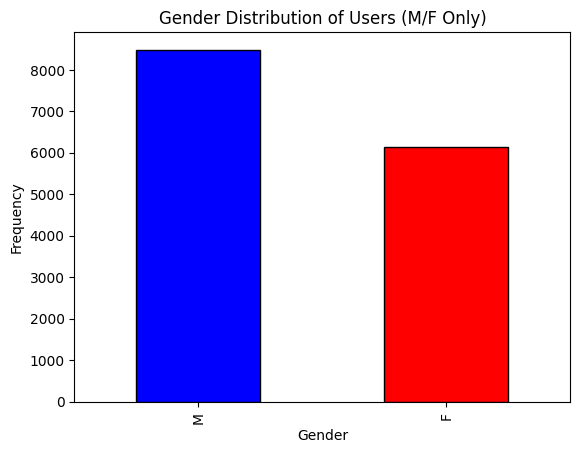

In [13]:
#Dropping all rows with 'gender' labeled 'O'
profile.drop(profile[profile['gender']=='O'].index,inplace=True)

profile['gender'].value_counts().plot(kind='bar', edgecolor='black', color=['b', 'r'])
plt.title('Gender Distribution of Users (M/F Only)')
plt.xlabel('Gender')
plt.ylabel('Frequency')

In [14]:
#All null values in 'profile' df
profile.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

We seem to be missing the same amount of rows with gender and income. This could be a systemic issue with how the data was collected. These rows are missing 40% of the data in this set, which tells me they wouldn't be very useful to a ML model. It's probably fine that we drop these rows. 

In [15]:
profile.dropna(inplace=True)

In [16]:
profile.isna().sum().sum()

0

Text(0, 0.5, 'Count')

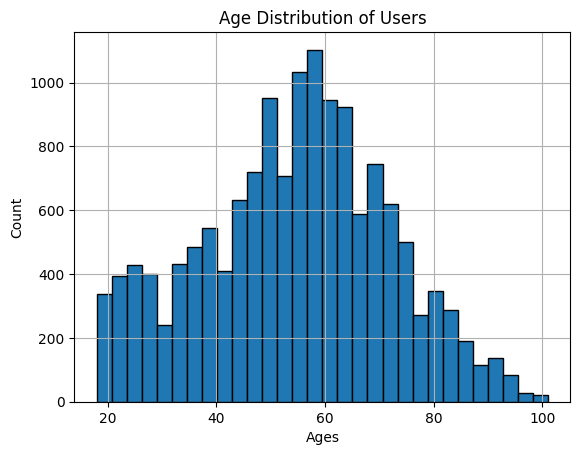

In [17]:
profile.age.hist(bins = 30, edgecolor='black')
plt.title('Age Distribution of Users')
plt.xlabel('Ages')
plt.ylabel('Count')

In [18]:
#Statistical Summary
profile.describe()

,age,became_member_on,income
count,14613.000000,1.461300e+04,14613.000000
mean,54.393417,2.016687e+07,65435.707931
std,17.400201,1.189517e+04,21633.524110
min,18.000000,2.013073e+07,30000.000000
25%,42.000000,2.016052e+07,49000.000000
50%,55.000000,2.017080e+07,64000.000000
75%,66.000000,2.017123e+07,80000.000000
max,101.000000,2.018073e+07,120000.000000


Text(0, 0.5, 'Count')

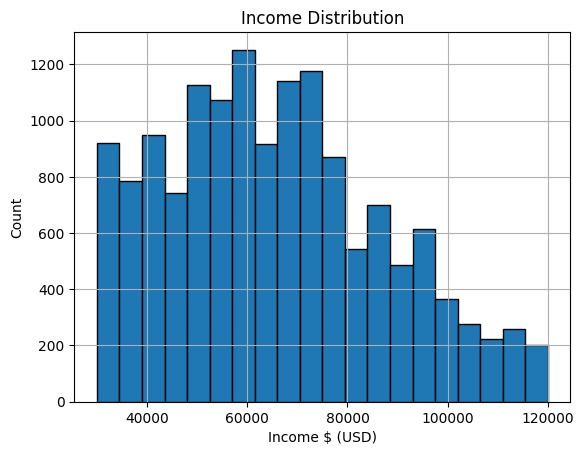

In [19]:
profile.income.hist(bins = 20, edgecolor='black')
plt.title('Income Distribution')
plt.xlabel('Income $ (USD)')
plt.ylabel('Count')

In [20]:
profile.rename(columns={"id": "user_id"}, inplace=True)
profile.head(1)

,gender,age,user_id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0


# Transcript Dataset Cleaning

In [21]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [22]:
#Renaming 'person' column to 'id' to keep consistency in dataset
transcript = transcript.rename(columns={'person':'id'})

#Renaming 'event' column to 'outcome'
transcript = transcript.rename(columns={'event':'outcome'})


In [23]:
transcript.head()

,id,outcome,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [24]:
#Looking at how many times each offer was offered
transcript.value.value_counts()

{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}    14983
{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}    14924
{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}    14891
{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}    14835
{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'}    14374
                                                    ...  
{'amount': 42.31}                                       1
{'amount': 44.62}                                       1
{'amount': 42.27}                                       1
{'amount': 108.89}                                      1
{'amount': 476.33}                                      1
Name: value, Length: 5121, dtype: int64

In [25]:
#Looking at how many times each event occurred
transcript.outcome.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: outcome, dtype: int64

Text(0.5, 1.0, 'Distribution of Offer Outcomes')

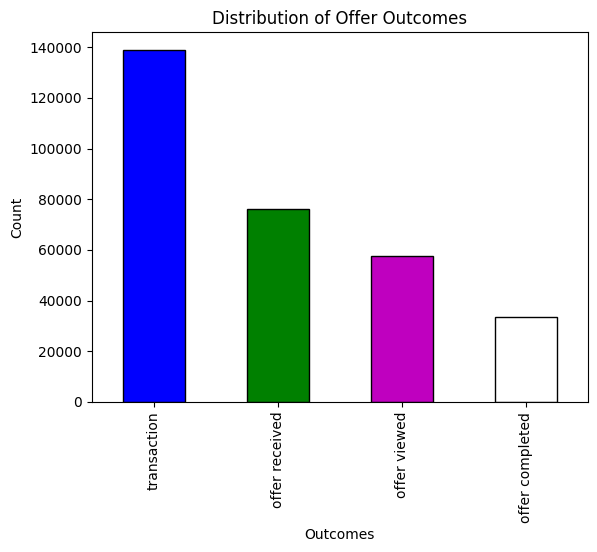

In [26]:
transcript['outcome'].value_counts().plot(kind='bar', edgecolor='black', color=['b','g','m','w'])
plt.ylabel('Count')
plt.xlabel('Outcomes')
plt.title('Distribution of Offer Outcomes')


In [27]:
#Function that cleans the transcript dataset
def clean_df(df):
    #Input : pandas dataframe (df)
    #Output : Cleaned pandas dataframe (df)
    
    #Splitting the columns of the dataframe
    df['offer_id'] = df['value'].apply(lambda x: x.get('offer_id'))
    df['offer id'] = df['value'].apply(lambda y: y.get('offer id'))
    df['reward']   = df['value'].apply(lambda z: z.get('reward'))
    df['amount']   = df['value'].apply(lambda a: a.get('amount'))
    
    #Combining "offer id" columns
    df['offer_id'] = df.apply(lambda b: b['offer id']if b['offer_id']==None else b['offer_id'], axis=1)
        
    #Dropping extra columns
    df.drop(['offer id', 'value'], axis=1, inplace=True)
    
    return df

transcript = clean_df(transcript)

In [28]:
#Replacing NaN values with 0
transcript.fillna(0, inplace=True)

In [29]:
transcript.offer_id.unique()

array(['9b98b8c7a33c4b65b9aebfe6a799e6d9',
       '0b1e1539f2cc45b7b9fa7c272da2e1d7',
       '2906b810c7d4411798c6938adc9daaa5',
       'fafdcd668e3743c1bb461111dcafc2a4',
       '4d5c57ea9a6940dd891ad53e9dbe8da0',
       'f19421c1d4aa40978ebb69ca19b0e20d',
       '2298d6c36e964ae4a3e7e9706d1fb8c2',
       '3f207df678b143eea3cee63160fa8bed',
       'ae264e3637204a6fb9bb56bc8210ddfd',
       '5a8bc65990b245e5a138643cd4eb9837', 0], dtype=object)

In [30]:
transcript.head()

,id,outcome,time,offer_id,reward,amount
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0.0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,0.0
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,0.0,0.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,0.0,0.0
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0,0.0


# Portfolio Dataset Cleaning

In [31]:
#Renaming id to offer_id
portfolio.rename(columns={'id':'offer_id'}, inplace=True)

In [32]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,offer_id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [33]:
#Splitting channels column into dummy variables
channel_list = []

for channel in portfolio['channels']:
    for i in channel:
        if i not in channel_list:
            channel_list.append(i)
            
for channel in channel_list : 
    portfolio[channel] = portfolio['channels'].apply(lambda x:
                                                     1 if channel in x else 0)
    
portfolio.drop('channels', axis = 1, inplace = True)



In [34]:
portfolio.head()

,reward,difficulty,duration,offer_type,offer_id,email,mobile,social,web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1


In [35]:
#Renaming columns for clarity
portfolio.rename(columns={'mobile':'app_offer', 'email':'email_offer', 'social':'social_media'}, inplace=True)

Text(0, 0.5, 'Count')

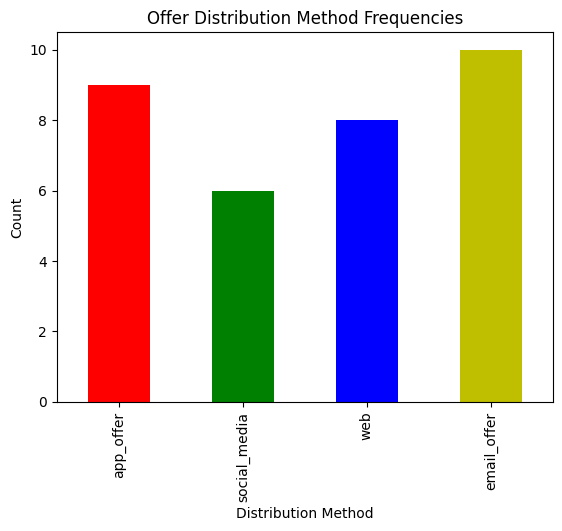

In [36]:
#Closer look at how each type of offer was distributed to users
#i.e was it on the Starbucks app, off of a social media ad, an email ad, or a web ad
portfolio[['app_offer', 'social_media','web', 'email_offer']].sum().plot(kind='bar', color=['r','g','b','y'])
plt.title('Offer Distribution Method Frequencies')
plt.xlabel('Distribution Method')
plt.ylabel('Count')

Text(0.5, 0, 'Offer Type')

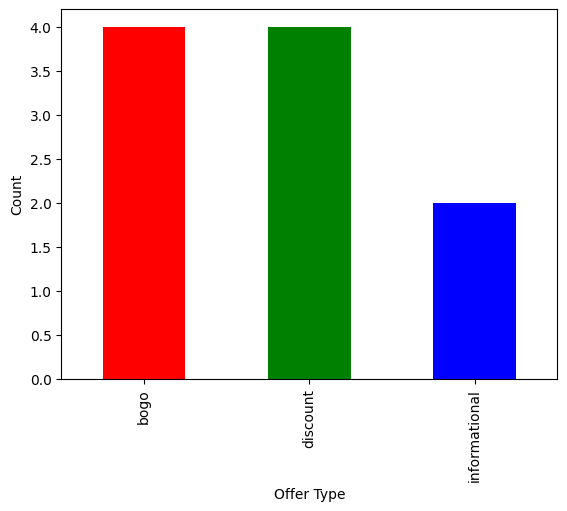

In [37]:
#Closer look at what type of offer was given out the most to users
portfolio.offer_type.value_counts().plot(kind='bar', color=['r','g','b'])
plt.ylabel('Count')
plt.xlabel('Offer Type')

In [38]:
portfolio.head()

,reward,difficulty,duration,offer_type,offer_id,email_offer,app_offer,social_media,web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1


In [39]:
profile.rename(columns={"user_id":'id'}, inplace=True)

In [40]:
df = transcript.merge(portfolio, on='offer_id')
df = df.merge(profile, on='id')
df.rename(columns={'id':'user_id'}, inplace=True)

df.head(1)

,user_id,outcome,time,offer_id,reward_x,amount,reward_y,difficulty,duration,offer_type,email_offer,app_offer,social_media,web,gender,age,became_member_on,income
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0.0,5,5,7,bogo,1,1,0,1,F,75,20170509,100000.0


In [41]:
df.shape

(146615, 18)

In [42]:
df.head(10)

,user_id,outcome,time,offer_id,reward_x,amount,reward_y,difficulty,duration,offer_type,email_offer,app_offer,social_media,web,gender,age,became_member_on,income
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0.0,5,5,7,bogo,1,1,0,1,F,75,20170509,100000.0
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0.0,5,5,7,bogo,1,1,0,1,F,75,20170509,100000.0
2,78afa995795e4d85b5d9ceeca43f5fef,offer completed,132,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,0.0,5,5,7,bogo,1,1,0,1,F,75,20170509,100000.0
3,78afa995795e4d85b5d9ceeca43f5fef,offer received,504,f19421c1d4aa40978ebb69ca19b0e20d,0.0,0.0,5,5,5,bogo,1,1,1,1,F,75,20170509,100000.0
4,78afa995795e4d85b5d9ceeca43f5fef,offer completed,510,f19421c1d4aa40978ebb69ca19b0e20d,5.0,0.0,5,5,5,bogo,1,1,1,1,F,75,20170509,100000.0
5,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,582,f19421c1d4aa40978ebb69ca19b0e20d,0.0,0.0,5,5,5,bogo,1,1,1,1,F,75,20170509,100000.0
6,78afa995795e4d85b5d9ceeca43f5fef,offer received,408,ae264e3637204a6fb9bb56bc8210ddfd,0.0,0.0,10,10,7,bogo,1,1,1,0,F,75,20170509,100000.0
7,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,408,ae264e3637204a6fb9bb56bc8210ddfd,0.0,0.0,10,10,7,bogo,1,1,1,0,F,75,20170509,100000.0
8,78afa995795e4d85b5d9ceeca43f5fef,offer completed,510,ae264e3637204a6fb9bb56bc8210ddfd,10.0,0.0,10,10,7,bogo,1,1,1,0,F,75,20170509,100000.0
9,78afa995795e4d85b5d9ceeca43f5fef,offer received,168,5a8bc65990b245e5a138643cd4eb9837,0.0,0.0,0,0,3,informational,1,1,1,0,F,75,20170509,100000.0


## Age Distribution of Dataset

In [43]:
#Adding in new "age_group" column in df
groups = [
    (df['age']<=18),
    (df['age']>18) &(df['age']<=24),
    (df['age']>24) &(df['age']<=35),
    (df['age']>35) &(df['age']<=44),
    (df['age']>44) &(df['age']<=54),
    (df['age']>54) &(df['age']<=64),
    (df['age']>=65)
]

bins = ['Under 18', '18-25', '24-35', '35-44', '45-54', '55-64', '65+']
df['age_group'] = np.select(groups, bins)
df.head()

,user_id,outcome,time,offer_id,reward_x,amount,reward_y,difficulty,duration,offer_type,email_offer,app_offer,social_media,web,gender,age,became_member_on,income,age_group
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0.0,5,5,7,bogo,1,1,0,1,F,75,20170509,100000.0,65+
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0.0,5,5,7,bogo,1,1,0,1,F,75,20170509,100000.0,65+
2,78afa995795e4d85b5d9ceeca43f5fef,offer completed,132,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,0.0,5,5,7,bogo,1,1,0,1,F,75,20170509,100000.0,65+
3,78afa995795e4d85b5d9ceeca43f5fef,offer received,504,f19421c1d4aa40978ebb69ca19b0e20d,0.0,0.0,5,5,5,bogo,1,1,1,1,F,75,20170509,100000.0,65+
4,78afa995795e4d85b5d9ceeca43f5fef,offer completed,510,f19421c1d4aa40978ebb69ca19b0e20d,5.0,0.0,5,5,5,bogo,1,1,1,1,F,75,20170509,100000.0,65+


Text(0, 0.5, 'Frequency')

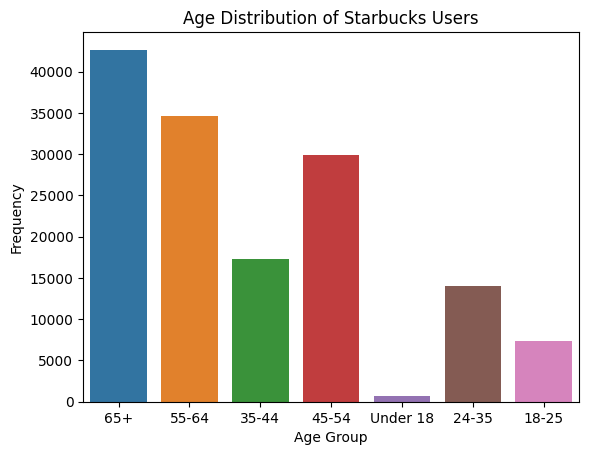

In [44]:
#Deeper look at age distribution
sns.countplot(data=df, x='age_group')
plt.title('Age Distribution of Starbucks Users')
plt.xlabel('Age Group')
plt.ylabel('Frequency')

Most of the users in this dataset are above the age of 45, with the largest demographic being those aged 55-64

Text(0.5, 1.0, 'Gender Distribution by User Age Group')

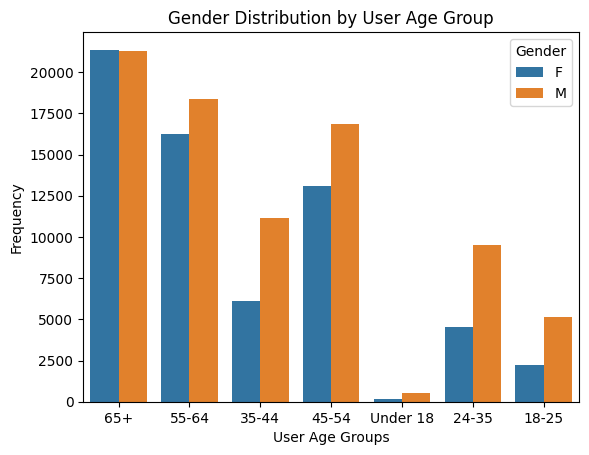

In [45]:
sns.countplot(data=df, hue='gender', x='age_group')
plt.legend(title='Gender')
plt.ylabel('Frequency')
plt.xlabel('User Age Groups')
plt.title("Gender Distribution by User Age Group")

It seems males outnumber females in every age category besides those aged 65+, which is the most populous group

## Average User Income

Text(0, 0.5, 'Count')

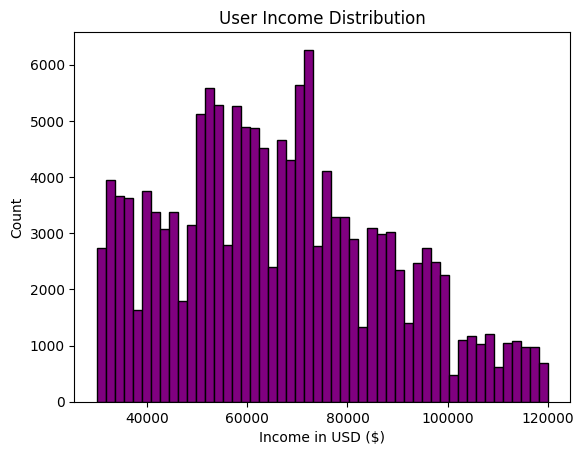

In [46]:
ax = df.income.plot(kind='hist', title='User Income Distribution', color='purple',
                   bins=50, edgecolor='black')
plt.xlabel('Income in USD ($)')
plt.ylabel('Count')

<AxesSubplot: title={'center': 'Outcome Distribution'}, ylabel='outcome'>

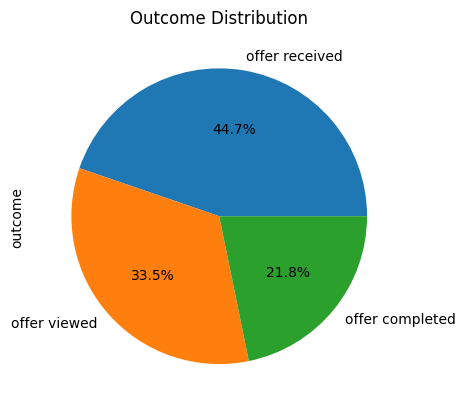

In [47]:
#Looking at the distribution of outcomes 

df.outcome.value_counts().plot(kind='pie', title='Outcome Distribution', autopct='%1.1f%%')

Text(0, 0.5, 'Count')

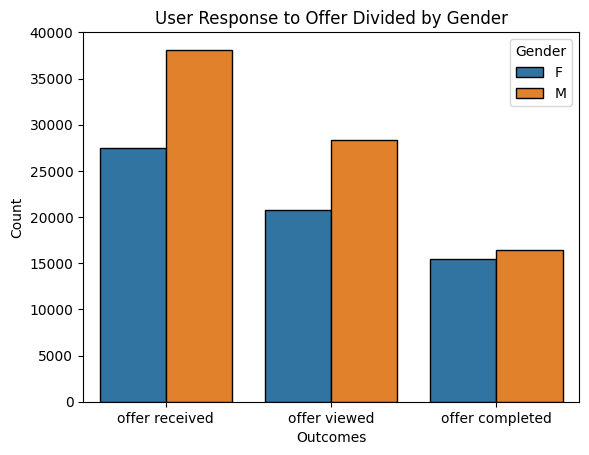

In [48]:
#How each gender responded to the different gender types
sns.countplot(data=df, x='outcome', hue='gender', edgecolor='black')
plt.title('User Response to Offer Divided by Gender')
plt.legend(title='Gender')
plt.xlabel('Outcomes')
plt.ylabel('Count')

In [49]:
df.head()

,user_id,outcome,time,offer_id,reward_x,amount,reward_y,difficulty,duration,offer_type,email_offer,app_offer,social_media,web,gender,age,became_member_on,income,age_group
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0.0,5,5,7,bogo,1,1,0,1,F,75,20170509,100000.0,65+
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0.0,5,5,7,bogo,1,1,0,1,F,75,20170509,100000.0,65+
2,78afa995795e4d85b5d9ceeca43f5fef,offer completed,132,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,0.0,5,5,7,bogo,1,1,0,1,F,75,20170509,100000.0,65+
3,78afa995795e4d85b5d9ceeca43f5fef,offer received,504,f19421c1d4aa40978ebb69ca19b0e20d,0.0,0.0,5,5,5,bogo,1,1,1,1,F,75,20170509,100000.0,65+
4,78afa995795e4d85b5d9ceeca43f5fef,offer completed,510,f19421c1d4aa40978ebb69ca19b0e20d,5.0,0.0,5,5,5,bogo,1,1,1,1,F,75,20170509,100000.0,65+


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146615 entries, 0 to 146614
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           146615 non-null  object 
 1   outcome           146615 non-null  object 
 2   time              146615 non-null  int64  
 3   offer_id          146615 non-null  object 
 4   reward_x          146615 non-null  float64
 5   amount            146615 non-null  float64
 6   reward_y          146615 non-null  int64  
 7   difficulty        146615 non-null  int64  
 8   duration          146615 non-null  int64  
 9   offer_type        146615 non-null  object 
 10  email_offer       146615 non-null  int64  
 11  app_offer         146615 non-null  int64  
 12  social_media      146615 non-null  int64  
 13  web               146615 non-null  int64  
 14  gender            146615 non-null  object 
 15  age               146615 non-null  int64  
 16  became_member_on  14

In [51]:
#Scaling all numerical columns to values between 0 and 1 (normalizing numeric features)
scaler = MinMaxScaler()

num_col = ['income', 'difficulty', 'duration', 'reward_x', 'time', 'reward_y', 'amount']

#Fitting and transforming the data
for num_col in num_col:
    df[num_col] = scaler.fit_transform(df[[num_col]])

In [52]:
df.head()

,user_id,outcome,time,offer_id,reward_x,amount,reward_y,difficulty,duration,offer_type,email_offer,app_offer,social_media,web,gender,age,became_member_on,income,age_group
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0.000000,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0.0,0.5,0.25,0.571429,bogo,1,1,0,1,F,75,20170509,0.777778,65+
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,0.008403,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0.0,0.5,0.25,0.571429,bogo,1,1,0,1,F,75,20170509,0.777778,65+
2,78afa995795e4d85b5d9ceeca43f5fef,offer completed,0.184874,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.5,0.0,0.5,0.25,0.571429,bogo,1,1,0,1,F,75,20170509,0.777778,65+
3,78afa995795e4d85b5d9ceeca43f5fef,offer received,0.705882,f19421c1d4aa40978ebb69ca19b0e20d,0.0,0.0,0.5,0.25,0.285714,bogo,1,1,1,1,F,75,20170509,0.777778,65+
4,78afa995795e4d85b5d9ceeca43f5fef,offer completed,0.714286,f19421c1d4aa40978ebb69ca19b0e20d,0.5,0.0,0.5,0.25,0.285714,bogo,1,1,1,1,F,75,20170509,0.777778,65+


## Dataframe Cleaning and Model Analysis

In [90]:
df.head()

,user_id,outcome,time,offer_id,reward_x,amount,reward_y,difficulty,duration,offer_type,email_offer,app_offer,social_media,web,gender,age,became_member_on,income,age_group
0,0,offer received,0.000000,0,0.0,0.0,0.5,0.25,0.571429,bogo,1,1,0,1,F,75,20170509,0.777778,65+
1,0,offer viewed,0.008403,0,0.0,0.0,0.5,0.25,0.571429,bogo,1,1,0,1,F,75,20170509,0.777778,65+
2,0,offer completed,0.184874,0,0.5,0.0,0.5,0.25,0.571429,bogo,1,1,0,1,F,75,20170509,0.777778,65+
3,0,offer received,0.705882,1,0.0,0.0,0.5,0.25,0.285714,bogo,1,1,1,1,F,75,20170509,0.777778,65+
4,0,offer completed,0.714286,1,0.5,0.0,0.5,0.25,0.285714,bogo,1,1,1,1,F,75,20170509,0.777778,65+


In [82]:
#Unique values in the id columns
offer_unique = df['offer_id'].unique()
user_unique = df['user_id'].unique()

#New values in the id columns
new_offer = dict(zip(offer_unique, range(len(offer_unique))))
new_user = dict(zip(user_unique, range(len(user_unique))))

#Mapping the new offer values into the offer_id columns 
df['offer_id'] = df['offer_id'].map(new_offer)
df['user_id'] = df['user_id'].map(new_user)

In [ ]:
#Dummy variables
df = pd.get_dummies(df, columns=['gender', 'age_group', 'offer_type'])
df = df.drop(columns='gender_F')

In [114]:
#Getting month and day of user joining 
df['became_member_on'] = df['became_member_on'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
df['became_month']     = df['became_member_on'].apply(lambda x: x.month)
df['became_year']      = df['became_member_on'].apply(lambda x: x.year)

df = df.drop('became_member_on', axis=1)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146615 entries, 0 to 146614
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   user_id                   146615 non-null  int64  
 1   outcome                   146615 non-null  object 
 2   time                      146615 non-null  float64
 3   offer_id                  146615 non-null  int64  
 4   reward_x                  146615 non-null  float64
 5   amount                    146615 non-null  float64
 6   reward_y                  146615 non-null  float64
 7   difficulty                146615 non-null  float64
 8   duration                  146615 non-null  float64
 9   email_offer               146615 non-null  int64  
 10  app_offer                 146615 non-null  int64  
 11  social_media              146615 non-null  int64  
 12  web                       146615 non-null  int64  
 13  age                       146615 non-null  i

In [117]:
#Train and Test Data
#divide the data into the input 'X' and the labels 'y'
X = df.drop('outcome', axis=1) #All the data besides the outcome 
y = df['outcome'] #the labels aka the outcome of each ad 

#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=50, stratify=y)

In [118]:
print("Training set: {} rows".format(X_train.shape[0]))
print("Testing set: {} rows".format(X_test.shape[0]))


Training set: 102630 rows
Testing set: 43985 rows


In [119]:
X_train = X_train.copy()
X_test  = X_test.copy()

In [120]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102630 entries, 38009 to 118280
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   user_id                   102630 non-null  int64  
 1   time                      102630 non-null  float64
 2   offer_id                  102630 non-null  int64  
 3   reward_x                  102630 non-null  float64
 4   amount                    102630 non-null  float64
 5   reward_y                  102630 non-null  float64
 6   difficulty                102630 non-null  float64
 7   duration                  102630 non-null  float64
 8   email_offer               102630 non-null  int64  
 9   app_offer                 102630 non-null  int64  
 10  social_media              102630 non-null  int64  
 11  web                       102630 non-null  int64  
 12  age                       102630 non-null  int64  
 13  income                    102630 non-nul

In [141]:
#Function that will train and test model, then output the results
def test_model(model):
    #input : Model that we will train
    #output : F1 and accuracy score of model
    
    train_predict = (model.fit(X_train, y_train)).predict(X_train)
    test_predict = (model.fit(X_train, y_train)).predict(X_test)
    
    train_f1 =accuracy_score(y_train,train_predict)*100
    test_f1= fbeta_score(y_test, test_predict ,beta = 0.5 ,average='micro' )*100
    model_name = model.__class__.__name__
    return train_f1, test_f1, model_name
    print('The training f1-score of the' + ' ' + model_name +  ' model is:', train_f1, '\n' + 
          'The testing f1-score of the'+ model_name+ ' model is:', test_f1, '\n')

In [142]:
knn_model = KNeighborsClassifier(n_neighbors = 69)
rf_model = RandomForestClassifier(random_state=15)
dt_model = DecisionTreeClassifier(random_state=10, criterion='entropy')

knn_train, knn_test, knn_name = test_model(knn_model)
rf_train, rf_test, rf_name = test_model(rf_model)
dt_train, dt_test, dt_name = test_model(dt_model)

In [164]:
model_results = {'Model': [knn_name, rf_name, dt_name],
          'Training F1 Score': [knn_train, rf_train, dt_train],
          'Testing F1 Score': [knn_test, rf_test, dt_test]}

model_df = pd.DataFrame(model_results)
print(model_df)

                    Model  Training F1 Score  Testing F1 Score
0    KNeighborsClassifier          45.071616         42.914630
1  RandomForestClassifier          95.010231         66.283960
2  DecisionTreeClassifier          95.011205         85.576901


From the chart above, we can see that the DecisionTreeClassifier was the most accurate of the three models, coming out with an F1 score of 85.58%, though the RandomForestClassifier was able to achieve nearly the same training score as the DecisionTree model. Coming in last of the three models is the KNeighborsClassification model, with around a 43% F1 score